In [1]:
# Import library

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Load data

path_major = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/Major/'
path_minor = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/Minor/'

filelist_major = os.listdir(path_major)
filelist_minor = os.listdir(path_minor)

In [3]:
# Spectrogram

fs = 44100
sig_len = 94815
time = np.linspace(0., sig_len/fs, sig_len)

signal_major = np.empty((3500,10))

for filename in filelist_major:

    file_major = f"{path_major}{filename}"

    _, signal = wavfile.read(file_major)

    freq, time, mag = spectrogram(signal[:sig_len], fs, nperseg = 10000, nfft = 50000)

    signal_major = np.concatenate((signal_major, np.log(mag + 1e-6)[:3500,:]), axis = 1)

signal_minor = np.empty((3500,10))

for filename in filelist_minor:

    file_minor = f"{path_minor}{filename}"

    _, signal = wavfile.read(file_minor)

    freq, time, mag = spectrogram(signal[:sig_len], fs, nperseg = 10000, nfft = 50000)

    signal_minor = np.concatenate((signal_minor, np.log(mag + 1e-6)[:3500,:]), axis = 1)

signal_major = signal_major[:,10:]; signal_minor = signal_minor[:,10:]


In [4]:
# Standardize the data

scaler = StandardScaler()

# Fit and apply transform to the major set.
scaler.fit(signal_major)
tf_major = scaler.transform(signal_major)

# Fit and apply transform to the minor set.
scaler.fit(signal_minor)
tf_minor = scaler.transform(signal_minor)

In [5]:
# Run PCA 

def runPCA(data, rate):
    pca = PCA(rate)
    pca.fit(data.T)

    pcaFit = pca.transform(data.T).T

    return pcaFit

# Major
major_image1 = runPCA(tf_major, 0.7)
major_image2 = runPCA(tf_major, 0.8)
major_image3 = runPCA(tf_major, 0.9)

# Minor
minor_image1 = runPCA(tf_minor, 0.7)
minor_image2 = runPCA(tf_minor, 0.8)
minor_image3 = runPCA(tf_minor, 0.9)

def save_spectrogramPCA_plot(image, filename):
    # Create a figure with no axes
    plt.figure(figsize=(10,10))

    c = plt.pcolormesh(image, cmap = "bone")
    plt.axis('off')  # Hide the axes
    
    tmp = c.get_clim()
    c.set_clim(0, tmp[1]/2)
    
    # Save the figure without padding and axes
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()

save_path1 = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map PCA/3.5kHz/0.7/Major/'
save_path2 = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map PCA/3.5kHz/0.8/Major/'
save_path3 = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map PCA/3.5kHz/0.9/Major/'

cnt = 0

for filename in filelist_major:

    savename = f"{save_path1}{filename.replace('.wav','')}.png"
    save_spectrogramPCA_plot(major_image1[:,0+(cnt*10):10+(cnt*10)], savename)

    savename = f"{save_path2}{filename.replace('.wav','')}.png"
    save_spectrogramPCA_plot(major_image2[:,0+(cnt*10):10+(cnt*10)], savename)

    savename = f"{save_path3}{filename.replace('.wav','')}.png"
    save_spectrogramPCA_plot(major_image3[:,0+(cnt*10):10+(cnt*10)], savename)

    cnt += 1

save_path1 = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map PCA/3.5kHz/0.7/Minor/'
save_path2 = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map PCA/3.5kHz/0.8/Minor/'
save_path3 = '/Users/woojaejeong/Desktop/Program/USC/Computational Introduction to Deep Learning/Project/Data/TF map PCA/3.5kHz/0.9/Minor/'

cnt = 0

for filename in filelist_minor:

    savename = f"{save_path1}{filename.replace('.wav','')}.png"
    save_spectrogramPCA_plot(minor_image1[:,0+(cnt*10):10+(cnt*10)], savename)

    savename = f"{save_path2}{filename.replace('.wav','')}.png"
    save_spectrogramPCA_plot(minor_image2[:,0+(cnt*10):10+(cnt*10)], savename)

    savename = f"{save_path3}{filename.replace('.wav','')}.png"
    save_spectrogramPCA_plot(minor_image3[:,0+(cnt*10):10+(cnt*10)], savename)

    cnt += 1


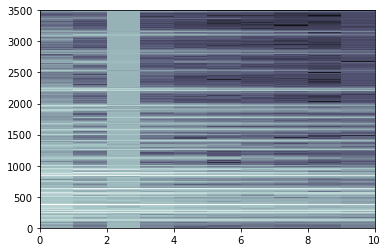

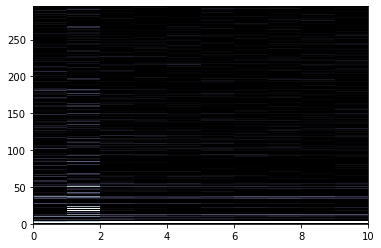

In [6]:
plt.pcolormesh(signal_major[:,0+10:10+10], cmap = "bone")
plt.show()

c = plt.pcolormesh(major_image3[:,:10], cmap = "bone")
tmp = c.get_clim()
c.set_clim(0, tmp[1]/2)
plt.show()